# Basics of Data Analysis in Python!
Welcome to the basics of data analytics in python! This will cover the basic functionality of python libraries like pandas, numpy, and matplotlib that you may use to manipulate and visualize data.

### A) IMPORT LIBRARIES

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats import power

### B) LOADING DATA
The first step is to read in the data that has been collected. To do this we will use the pandas python library. Pandas is a popular open-source data manipulation and analysis library for Python. It provides data structures for efficiently storing and manipulating large datasets and tools for working with structured data. The primary data structure in pandas is the 'DataFrame' package.

##### Creating a Pandas Dataframe
Reading in a CSV file and an Excel spreadsheet

In [163]:
# Read in csv file stored in data_analysis/data_samples
csv_input = './Data Samples/nba_stats.csv'
csv_df = pd.read_csv(csv_input)

# Display the new DataFrame
display(csv_df)

# Read in .xlsx file stored in data_analysis/data_samples
# xlsx_input = './Data Samples/sample.xlsx'
# xlsx_df = pd.read_excel(xlsx_input)



,Name,Position,PPG,RPG,APG
0,LeBron James,SF,25.4,7.9,7.3
1,Kevin Durant,PF,27.0,7.1,5.4
2,Stephen Curry,PG,30.5,5.5,6.6
3,Giannis Antetokounmpo,PF,28.1,11.0,6.1
4,Kawhi Leonard,SF,26.9,6.9,4.3
5,Luka Dončić,PG,28.8,8.2,8.4
6,Anthony Davis,PF,23.0,9.4,3.3
7,James Harden,SG,25.0,5.5,11.0
8,Joel Embiid,C,28.5,11.0,3.5
9,Jayson Tatum,SF,24.8,7.0,4.3


#### Exploring the Data

In [164]:
n = 5

# Remember python index starts at 0, not 1
# First n rows of the DataFrame
print("Head:")
display(csv_df.head(n))

# Last n rows of the DataFrame
print("Tail:")
display(csv_df.tail(n))

# Number of rows and columns in the DataFrame
print(f"Shape: {csv_df.shape}\n")

# Summary of the DataFrame
print(f"Info: ")
display(csv_df.info())

# Descriptive statistics of the DataFrame
print(f"Describe: {csv_df.describe()}\n")

# List of column names
print(f"Columns: {csv_df.columns}\n")

# Sum, mean, standard deviation, minimum, and maximum of each column
# print(f"Sum: {csv_df.sum()}\nMean: {csv_df.mean()}\nStD: {csv_df.std()}\nMin: {csv_df.min}\nMax: {csv_df.max}")

Head:


,Name,Position,PPG,RPG,APG
0,LeBron James,SF,25.4,7.9,7.3
1,Kevin Durant,PF,27.0,7.1,5.4
2,Stephen Curry,PG,30.5,5.5,6.6
3,Giannis Antetokounmpo,PF,28.1,11.0,6.1
4,Kawhi Leonard,SF,26.9,6.9,4.3


Tail:


,Name,Position,PPG,RPG,APG
15,Russell Westbrook,PG,22.2,11.5,11.7
16,Zion Williamson,PF,27.0,7.2,3.7
17,De'Aaron Fox,PG,24.5,3.5,7.2
18,Chris Paul,PG,16.4,4.5,8.9
19,Jaylen Brown,SG,24.8,6.0,3.4


Shape: (20, 5)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      20 non-null     object 
 1   Position  20 non-null     object 
 2   PPG       20 non-null     float64
 3   RPG       20 non-null     float64
 4   APG       20 non-null     float64
dtypes: float64(3), object(2)
memory usage: 932.0+ bytes


None

Describe:              PPG        RPG        APG
count  20.000000  20.000000  20.000000
mean   25.720000   7.135000   6.140000
std     3.412917   2.483477   2.491755
min    16.400000   3.500000   3.300000
25%    24.450000   5.300000   4.300000
50%    25.500000   6.950000   5.750000
75%    28.200000   8.500000   7.350000
max    31.300000  11.500000  11.700000

Columns: Index(['Name', 'Position', 'PPG', 'RPG', 'APG'], dtype='object')



#### Sorting the Data

In [165]:
# Sorting data based on player salary
# Function defaults to ascending order, ascending=False changes to descending order
sorted_df = csv_df.sort_values(by='PPG', ascending=False)

n = 5
# Display N highest scoring players using .head
print(f"{str(n)} highest scoring players in the DataFrame:")
display(sorted_df.head(n))

# Display N lowest scoring players using .tail
print(f"{str(n)} lowest scoring players in the DataFrame:")
display(sorted_df.tail(n))


5 highest scoring players in the DataFrame:


,Name,Position,PPG,RPG,APG
14,Bradley Beal,SG,31.3,4.7,4.4
2,Stephen Curry,PG,30.5,5.5,6.6
12,Damian Lillard,PG,28.8,4.2,7.5
5,Luka Dončić,PG,28.8,8.2,8.4
8,Joel Embiid,C,28.5,11.0,3.5


5 lowest scoring players in the DataFrame:


,Name,Position,PPG,RPG,APG
10,Karl-Anthony Towns,C,24.3,10.5,4.4
6,Anthony Davis,PF,23.0,9.4,3.3
15,Russell Westbrook,PG,22.2,11.5,11.7
11,Jimmy Butler,SF,21.5,6.9,7.1
18,Chris Paul,PG,16.4,4.5,8.9


#### Cleaning Bad Data Entries
In some cases, there may be data entries with null values, or with outliers that we want to filter out. In this example, we will add four data entries; two with null values, two with outlying values. *\*Unsure of a more efficient way to add these rows to a dataframe\**

In [166]:
# First, we add the bad data entries into a list
new_entries = [
    {'Name': 'Tyler Trimble', 'Position': 'PF', 'PPG': 22, 'RPG': 11, 'APG': 2.3},
    {'Name': 'Kaela Nel', 'Position': 'SF', 'PPG': 28.2, 'RPG': 6.5, 'APG': 1.9},
    {'Name': 'Clairiz Nel', 'Position': 'PG', 'PPG': 19.1, 'RPG': None, 'APG': 1.6},
    {'Name': 'Connor Nel', 'Position': 'PF', 'PPG': None, 'RPG': 75, 'APG': 4.3},
]

# Create a temporary dataframe that holds the new entries
temp_df = pd.DataFrame(new_entries)

# Concatenate (merge) the temporary dataframe with the already existing one 
# ignore_index=True just concat's the values to the end of the dataframe
df = pd.concat([csv_df, temp_df], ignore_index=True)
display(df.tail(10))

,Name,Position,PPG,RPG,APG
14,Bradley Beal,SG,31.3,4.7,4.4
15,Russell Westbrook,PG,22.2,11.5,11.7
16,Zion Williamson,PF,27.0,7.2,3.7
17,De'Aaron Fox,PG,24.5,3.5,7.2
18,Chris Paul,PG,16.4,4.5,8.9
19,Jaylen Brown,SG,24.8,6.0,3.4
20,Tyler Trimble,PF,22.0,11.0,2.3
21,Kaela Nel,SF,28.2,6.5,1.9
22,Clairiz Nel,PG,19.1,NaN,1.6
23,Connor Nel,PF,NaN,75.0,4.3


Now that the four bad data entries have been added, we want to first clean all rows with null values. We then want to check values that are outliers by implementing an interquartile range check algorithm.

In [167]:
# Display rows with null values
print(f"Entries with null values:")
display(df[df.isnull().any(axis=1)])

# Delete any rows with null values
df = df.dropna()

# Function to filter outliers based on interquartile range (IQR)
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Outliers:\n {df[(df[column] < lower_bound) | (df[column] > upper_bound)]}")
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Filter outliers in the 'Salary' column
df_filtered = filter_outliers(df, 'PPG')
# display(df_filtered)

Entries with null values:


,Name,Position,PPG,RPG,APG
22,Clairiz Nel,PG,19.1,NaN,1.6
23,Connor Nel,PF,NaN,75.0,4.3


Lower bound: 18.612500000000004
Upper bound: 33.9125
Outliers:
           Name Position   PPG  RPG  APG
18  Chris Paul       PG  16.4  4.5  8.9


### C) VISUALIZING DATA

#### Correlation Matricies

In [168]:
correlation_matrix = df[['PPG', 'RPG', 'APG']].corr()
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,PPG,RPG,APG
PPG,1.000000,-0.095778,-0.246866
RPG,-0.095778,1.000000,-0.120220
APG,-0.246866,-0.120220,1.000000


#### Boxplot and Histograms

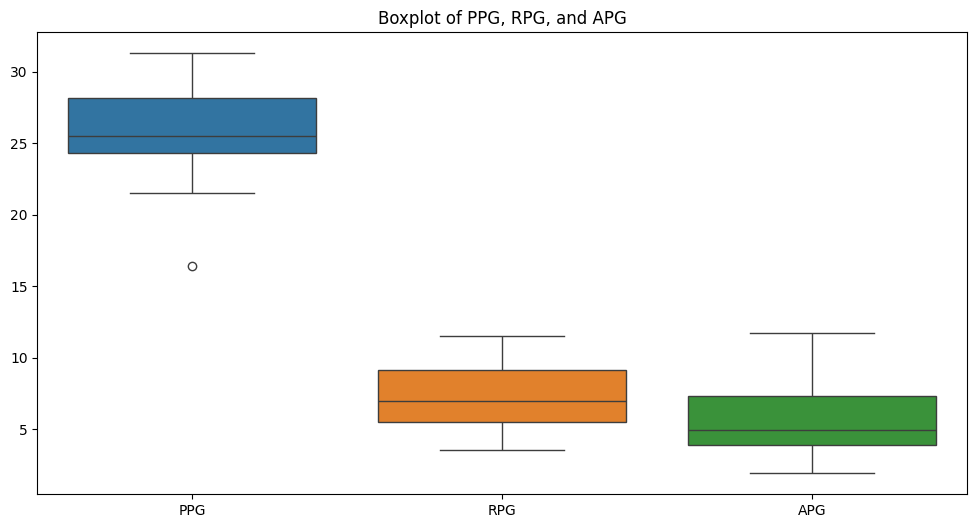

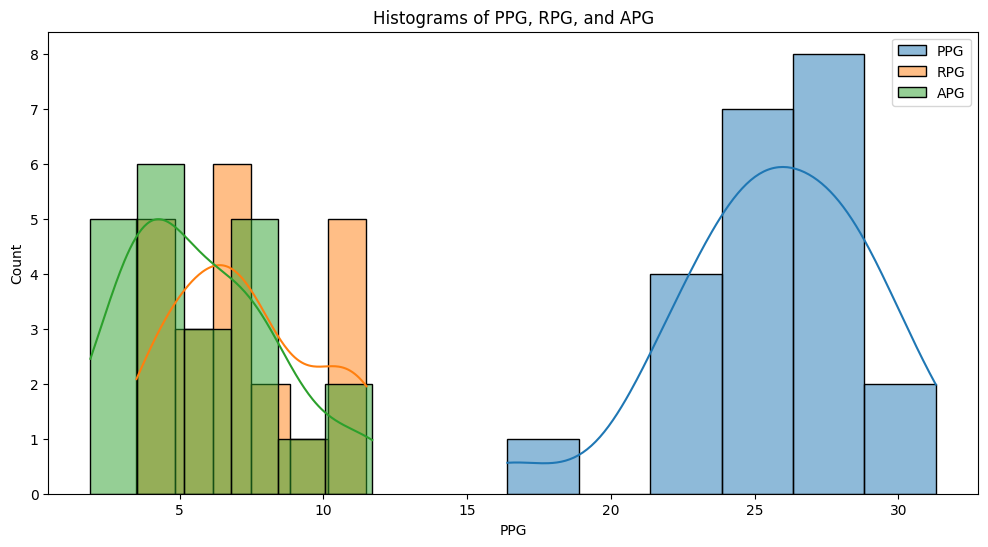

In [169]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['PPG', 'RPG', 'APG']])
plt.title('Boxplot of PPG, RPG, and APG')
plt.show()

# Histograms
plt.figure(figsize=(12, 6))
for column in ['PPG', 'RPG', 'APG']:
    sns.histplot(df[column], kde=True, label=column)
plt.title('Histograms of PPG, RPG, and APG')
plt.legend()
plt.show()

#### T-Tests, ANOVA, and Effect Size
Because the provided dataset doesn't have clear groups for a t-test or ANOVA, we can create hypothetical scenarios to demonstrate these statistical tests. For example, we can compare statistics between players of different positions.

In [170]:
# Hypothetical Scenario: Comparing PPG between different positions
positions = df['Position'].unique()

# Perform t-test between two positions (e.g., comparing SF and PG)
position1 = 'SF'
position2 = 'PG'
t_stat, p_value = ttest_ind(df[df['Position'] == position1]['PPG'], df[df['Position'] == position2]['PPG'])
print(f"T-test Results between {position1} and {position2}:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Perform ANOVA for all positions
anova_result = f_oneway(*[df[df['Position'] == pos]['PPG'] for pos in positions])
print("\nANOVA Results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Calculate Effect Size (Cohen's d) between two positions
cohens_d = (df[df['Position'] == position1]['PPG'].mean() - df[df['Position'] == position2]['PPG'].mean()) / \
           ((df[df['Position'] == position1]['PPG'].std() + df[df['Position'] == position2]['PPG'].std()) / 2)
print("\nEffect Size (Cohen's d) between {} and {}: {}".format(position1, position2, cohens_d))

T-test Results between SF and PG:
T-statistic: 0.061415564938099555
P-value: 0.95237050080637

ANOVA Results:
F-statistic: 0.13119019106807972
P-value: 0.9688395516532826

Effect Size (Cohen's d) between SF and PG: 0.040807855732422564


### D) SAVING DATA